# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [3]:
x.shape, y.shape

((150, 4), (150,))

In [4]:
np.unique(y)

array([0, 1, 2])

## train set, test set 구분하기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((120, 4), (30, 4), (120,), (30,))

## **sepal끼리, petal끼리**

In [7]:
list(df_x)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
tr_x_s = train_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
te_x_s = test_x.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

tr_x_p = train_x.loc[:, ['petal length (cm)', 'petal width (cm)']]
te_x_p = test_x.loc[:, ['petal length (cm)', 'petal width (cm)']]

tr_x_s.shape, te_x_s.shape, tr_x_p.shape, te_x_p.shape

((120, 2), (30, 2), (120, 2), (30, 2))

## One-hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
class_n = len(np.unique(train_y))
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, test_y.shape

((120, 3), (30, 3))

## Modeling : multi-input & Add layer

In [27]:
# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 엮기
il_s = keras.layers.Input(shape=(2, ))
hl_s = keras.layers.Dense(4, activation='relu')(il_s)

il_p = keras.layers.Input(shape=(2, ))
hl_p = keras.layers.Dense(4, activation='relu')(il_p)

al = keras.layers.Add()([hl_s, hl_p])
ol = keras.layers.Dense(3, activation='softmax')(al)

# 3. 모델 선언
model = keras.models.Model([il_s, il_p], ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [28]:
from tensorflow.keras.utils import plot_model

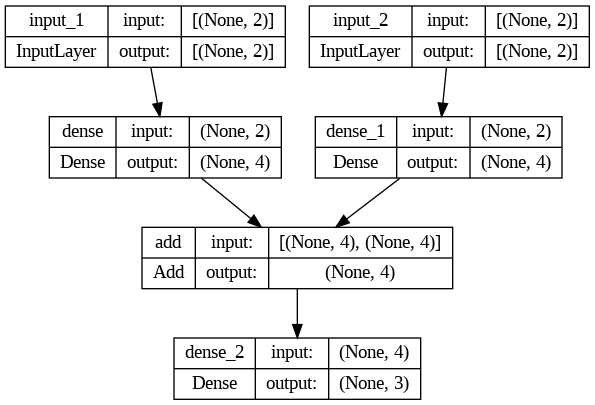

In [29]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

In [32]:
model.fit([tr_x_s, tr_x_p], train_y, validation_split=0.1, epochs=1000, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 111ms/step - loss: 2.9312 - accuracy: 0.3519 - val_loss: 2.2797 - val_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 23ms/step - loss: 2.8653 - accuracy: 0.3519 - val_loss: 2.2299 - val_accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 17ms/step - loss: 2.8047 - accuracy: 0.3519 - val_loss: 2.1810 - val_accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.7407 - accuracy: 0.3519 - val_loss: 2.1341 - val_accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 2.6805 - accuracy: 0.3519 - val_loss: 2.0869 - val_accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 2.6235 - accuracy: 0.3519 - val_loss: 2.0392 - val_accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 23ms/step - loss: 2.5622 - accuracy: 0.3519 - val_loss: 1.9937 - val_accuracy: 0.5000
Epoch 8/1000

In [33]:
model.evaluate([te_x_s, te_x_p], test_y)

1/1 [==============================] - 0s 51ms/step - loss: 0.5167 - accuracy: 0.6667


[0.5166556239128113, 0.6666666865348816]